#Natural Language Processing NLP

###Install the libraries needed

In [21]:
# pip install nltk pandas


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

###Explore the data in the movie_review

In [2]:
def create_reviews_df():
    reviews = []
    sentiments = []

    for fileid in movie_reviews.fileids():
        reviews.append(movie_reviews.raw(fileid))
        sentiment = movie_reviews.categories(fileid)[0]
        sentiments.append(sentiment)

    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})

reviews_df = create_reviews_df()

In [44]:
reviews_df

,review,sentiment,preprocessed_review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...
...,...,...,...
1995,wow ! what a movie . \nit's everything a movie...,pos,wow movie everything movie funny dramatic inte...
1996,"richard gere can be a commanding actor , but h...",pos,richard gere commanding actor always great fil...
1997,"glory--starring matthew broderick , denzel was...",pos,glory starring matthew broderick denzel washin...
1998,steven spielberg's second epic film on world w...,pos,steven spielberg second epic film world war ii...


In [45]:
len(movie_reviews.fileids())

2000

###Tokenization and cleaning the data

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lowercase and remove non-alphabetic characters
    words = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)

# Apply the preprocessing pipeline on the reviews
reviews_df["preprocessed_review"] = reviews_df["review"].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
reviews_df.head()

,review,sentiment,preprocessed_review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


###Applying Vectorization Techniques on the review column
We will apply the vectorization techniques (CountVectorization, N-Grams vectorizaton, and TF-IDF vectorization) on the DataFrame containing reviews.

#### Define a Function to Vectorize Reviews

In [50]:
def vectorize_reviews(df, column, vectorizer):
    vectorized_fit_data = vectorizer.fit_transform(df[column])
    return pd.DataFrame(vectorized_fit_data.toarray(), columns=vectorizer.get_feature_names_out())

#### Apply Count Vectorization on the review column

In [51]:
count_vec_reviews = vectorize_reviews(reviews_df, "review", CountVectorizer())

In [52]:
count_vec_reviews.head()

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Apply N-Grams Vectorization on the review column


In [53]:
ngram_vec_reviews = vectorize_reviews(reviews_df, "review", CountVectorizer(ngram_range=(1, 2)))
ngram_vec_reviews.head()

,00,00 am,00 feet,00 for,00 if,00 showing,00 sunday,00 wasn,000,000 000,...,zwick the,zwick thinks,zwigoff,zwigoff brilliant,zwigoff superb,zycie,zycie masterfully,zycie za,zzzzzzz,zzzzzzz critique
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Apply TF-IDF Vectorization on the review column

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf_vec_reviews = vectorize_reviews(reviews_df, "review", TfidfVectorizer())
tfidf_vec_reviews.head()

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sentiment Analysis Using Vectorized Reviews
We will use the vectorized reviews (done with TF-IDF vectorizaton above) to perform sentiment analysis using a simple machine learning model. We will use the logistic regression as our classification model.

####Required Libraries

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review               2000 non-null   object
 1   sentiment            2000 non-null   object
 2   preprocessed_review  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


#### Preparing the Data for Sentiment Analysis

In [15]:
X = tfidf_vec_reviews
y = reviews_df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.shape

(2000, 39659)

In [17]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1600, 39659)
y_train shape:  (1600,)
X_test shape:  (400, 39659)
y_test shape:  (400,)


#### Train the Logistic Regression Model for Sentiment Analysis

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Make Predictions and Evaluate the Model

####Evaluating the Model

Accuracy: 0.8125


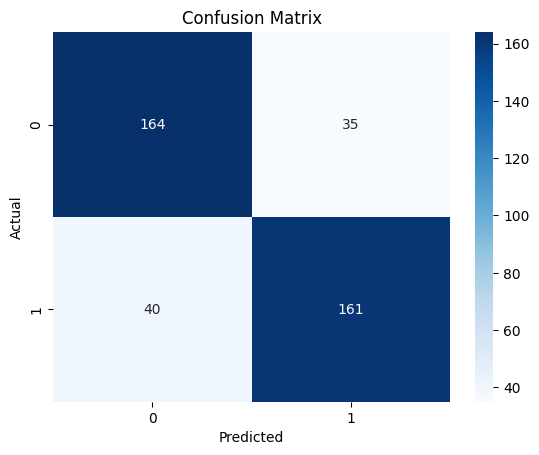

Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.82      0.81       199
         pos       0.82      0.80      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

####Predict Sentiment given new reviews
Now that our sentiment analysis model is trained, we can use it to predict the sentiment of new reviews.

In [57]:
new_reviews = [
    "I thoroughly enjoyed the movie! The visuals were stunning and the plot was captivating.",
    "The movie was a waste of time. I wouldn't recommend it to anyone.",
    "The film was average. The acting was decent, but the story could have been better.",
]

# Vectorize the new reviews
new_reviews_vectorized = TfidfVectorizer(vocabulary=tfidf_vec_reviews).fit_transform(new_reviews)                      #we're scaling according to tfidf_vec_reviews so the logistic regression can learn from it and predict from new_reviews

# Predict the sentiment of new reviews
new_sentiments = log_reg.predict(new_reviews_vectorized)

for i, sentiment in enumerate(new_sentiments):
    print(f"Review {i + 1}: {sentiment}")

#we could have used # new_reviews_vectorized = TfidfVectorizer(vocabulary=tfidf_vec_reviews.columns).fit_transform(new_reviews)

Review 1: pos
Review 2: neg
Review 3: neg


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


####Our Model is working properly as it was able to classify the review correctly as positive or negative.